## Protein Folding

Proteins are consist of amino acids, they have a main chain and also can have some sub chains <br>
Each letter shows an amino acid in one-letter-code coding of a protein <br>
You can find the one-letter-code of each amino acid in https://en.wikipedia.org/wiki/Amino_acid

<table>
  <tr>
    <th>Amini acid</th>
    <th>3-letter symbols</th>
    <th>1-letter symbols</th>
  </tr>
  <tr>
    <td>Alanine</td>
    <td>Ala</td>
    <td>A</td>
  </tr>
    <tr>
    <td>Proline</td>
    <td>Pro</td>
    <td>P</td>
  </tr>
  <tr>
    <td>Arginine</td>
    <td>Arg</td>
    <td>R</td>
  </tr>
    <tr>
    <td>Leucine</td>
    <td>Leu</td>
    <td>L</td>
  </tr>
    <tr>
    <td>Phenylalanine</td>
    <td>Phe</td>
    <td>F</td>
  </tr>
    <tr>
    <td>Tyrosine</td>
    <td>Tyr</td>
    <td>Y</td>
  </tr>
</table>

In [1]:
main_chain = "APRLRFY" #Alanine,Proline,Arginine,Leucine,Arginine,Phenylalanine,Tyrosine / 7 amino acids
side_chains = [""] * 7 # seven empty side chains = no side chains = ['', '', '', '', '', '', '']

In [2]:
print(side_chains)

['', '', '', '', '', '', '']


There are several amino acids contact energy functions/networks. Only two have been used in quantum applications.
1. The hydrophobic-polar model, which considers only two classes of amino acids
2. The Miyazawa–Jernigan model, containing interactions for every pair of residues. 

Here, we use Miyazawa–Jernigan model for interaction between amino acids.

In [3]:
from qiskit_nature.problems.sampling.protein_folding.interactions.random_interaction import RandomInteraction
from qiskit_nature.problems.sampling.protein_folding.interactions.miyazawa_jernigan_interaction import MiyazawaJerniganInteraction

random = RandomInteraction()
miyazawa_jernigan = MiyazawaJerniganInteraction()

## Physical Constraints

???

In [4]:
from qiskit_nature.problems.sampling.protein_folding.penalty_parameters import PenaltyParameters
# ????
penalty_back = 10
penalty_chiral = 10
penalty_1 = 10

penalty_terms = PenaltyParameters(penalty_chiral, penalty_back, penalty_1)

## Protein Definition
Proteins are consist of one or some peptides. Peptides are consist of amino acids.<br><br>
Here, we define a protein that is made of one peptide. 

In [5]:
from qiskit_nature.problems.sampling.protein_folding.peptide.peptide import Peptide
protein1 = Peptide(main_chain, side_chains)

## Protein Folding Function
Now, we can use ProteinFoldingProblem function to solve this problem based on:
1. defined peptide
2. the interaction (contact map) 
3. the penalty terms

In [6]:
from qiskit_nature.problems.sampling.protein_folding.protein_folding_problem import ProteinFoldingProblem
# solution 1: using Miyazawa-Jernigan Interaction
protein_folding_1 = ProteinFoldingProblem(protein1, miyazawa_jernigan, penalty_terms)
qubit_operations_1 = protein_folding_1.qubit_op()
print(qubit_operations_1)

1613.5895000000003 * IIIIIIIII
- 701.802 * ZIIIIIIII
- 904.2875 * IZIIIIIII
+ 192.5 * IIZIIIIII
- 200.0 * ZIZIIIIII
+ 7.5 * IZZIIIIII
+ 105.0 * IIIZIIIII
- 105.0 * ZIIZIIIII
+ 95.0 * IIZZIIIII
- 100.0 * ZIZZIIIII
+ 5.0 * IZZZIIIII
- 497.5 * IIIIZIIII
+ 195.0 * ZIIIZIIII
+ 302.5 * IZIIZIIII
- 95.0 * IIZIZIIII
+ 100.0 * ZIZIZIIII
- 2.5 * IZZIZIIII
- 100.0 * IIIIIZIII
+ 102.5 * ZIIIIZIII
- 2.5 * IZIIIZIII
- 95.0 * IIIZIZIII
+ 100.0 * ZIIZIZIII
- 2.5 * IZIZIZIII
- 300.0 * IIIIZZIII
+ 97.5 * ZIIIZZIII
+ 202.5 * IZIIZZIII
- 95.0 * IIZZZZIII
+ 100.0 * ZIZZZZIII
- 2.5 * IZZZZZIII
+ 487.5 * IIIIIIZII
- 195.0 * ZIIIIIZII
- 295.0 * IZIIIIZII
+ 97.5 * IIZIIIZII
- 100.0 * ZIZIIIZII
+ 2.5 * IZZIIIZII
- 195.0 * IIIIZIZII
+ 97.5 * ZIIIZIZII
+ 100.0 * IZIIZIZII
+ 100.0 * IIIIIIIZI
- 102.5 * ZIIIIIIZI
+ 2.5 * IZIIIIIZI
+ 97.5 * IIIZIIIZI
- 100.0 * ZIIZIIIZI
+ 2.5 * IZIZIIIZI
- 195.0 * IIIIIZIZI
+ 97.5 * ZIIIIZIZI
+ 100.0 * IZIIIZIZI
+ 295.0 * IIIIIIZZI
- 97.5 * ZIIIIIZZI
- 197.5 * IZIIIIZZI
+ 97.5 * IIZ

The number shows ??? <br>
Each string consists of 9 characters (why 9 ???). Each character shows a Pauli gate (I,X,Y,Z) that should apply to the corresponding qubit.

In [7]:
# solution 2: using Random Interaction
protein_folding_2 = ProteinFoldingProblem(protein1, random, penalty_terms)
qubit_operations_2 = protein_folding_2.qubit_op()
print(qubit_operations_2)

1613.5509360816177 * IIIIIIIII
- 701.7826173731131 * ZIIIIIIII
- 904.2683187085045 * IZIIIIIII
+ 192.5 * IIZIIIIII
- 200.0 * ZIZIIIIII
+ 7.5 * IZZIIIIII
+ 105.0 * IIIZIIIII
- 105.0 * ZIIZIIIII
+ 95.0 * IIZZIIIII
- 100.0 * ZIZZIIIII
+ 5.0 * IZZZIIIII
- 497.5 * IIIIZIIII
+ 195.0 * ZIIIZIIII
+ 302.5 * IZIIZIIII
- 95.0 * IIZIZIIII
+ 100.0 * ZIZIZIIII
- 2.5 * IZZIZIIII
- 100.0 * IIIIIZIII
+ 102.5 * ZIIIIZIII
- 2.5 * IZIIIZIII
- 95.0 * IIIZIZIII
+ 100.0 * ZIIZIZIII
- 2.5 * IZIZIZIII
- 300.0 * IIIIZZIII
+ 97.5 * ZIIIZZIII
+ 202.5 * IZIIZZIII
- 95.0 * IIZZZZIII
+ 100.0 * ZIZZZZIII
- 2.5 * IZZZZZIII
+ 487.5 * IIIIIIZII
- 195.0 * ZIIIIIZII
- 295.0 * IZIIIIZII
+ 97.5 * IIZIIIZII
- 100.0 * ZIZIIIZII
+ 2.5 * IZZIIIZII
- 195.0 * IIIIZIZII
+ 97.5 * ZIIIZIZII
+ 100.0 * IZIIZIZII
+ 100.0 * IIIIIIIZI
- 102.5 * ZIIIIIIZI
+ 2.5 * IZIIIIIZI
+ 97.5 * IIIZIIIZI
- 100.0 * ZIIZIIIZI
+ 2.5 * IZIZIIIZI
- 195.0 * IIIIIZIZI
+ 97.5 * ZIIIIZIZI
+ 100.0 * IZIIIZIZI
+ 295.0 * IIIIIIZZI
- 97.5 * ZIIIIIZZI
- 197.5 * IZI

## VQE with CVaR expectation


The difference of this method with VQE is the expectation value.<br>
In this section, we should set the parameters of VQE algorithm such as:
1. optimizer
2. ansatz
3. backend

Qiskit supports some classic optimizers such as COBYLA, L_BFGS_B, SPSA, SLSQP. You can see the optimizers in https://qiskit.org/documentation/stubs/qiskit.algorithms.optimizers.html.<br>

Here we use COBYLA (why???). You can see The parameters of this optimizer in https://qiskit.org/documentation/stubs/qiskit.algorithms.optimizers.COBYLA.html


In [8]:
from qiskit.algorithms.optimizers import COBYLA
# set classical optimizer
optimizer = COBYLA(maxiter=50)

Ansatz (ansatz circuit) contains of some parameterized gates. There are several ansatz circuits in qiskit such as EfficientSU2, TwoLocal, NLocal, PauliTwoDesign, RealAmplitudes. For more information see https://qiskit.org/documentation/apidoc/circuit_library.html N-local circuits section<br><br>
We selected RealAmplitudes (why??). You can see the parameters of this ansatz in https://qiskit.org/documentation/stubs/qiskit.circuit.library.RealAmplitudes.html .

In [9]:
from qiskit.circuit.library import RealAmplitudes
# set variational ansatz
ansatz = RealAmplitudes(reps=1)

For executing this circut we use simulator from Qiskit. For more information look at https://qiskit.org/documentation/tutorials/simulators/1_aer_provider.html.

In [10]:
from qiskit.utils import QuantumInstance
from qiskit import execute, Aer
# set the backend
backend = "aer_simulator"
backend = QuantumInstance(
    Aer.get_backend(backend),
    shots=1000,
)

This part is arbitrary. We can use callback function to save the results of each iteration, then we can plot it and see the trend.

In [11]:
counts = []
values = []

def callback_function(eval_count, parameters, mean, std):
    counts.append(eval_count)
    values.append(mean)


Finally we should set expectation. There are some expectation functions in Qiskit https://qiskit.org/documentation/stubs/qiskit.opflow.expectations.html. <br>
Here we choose CVaRExpectation. For more information look at https://qiskit.org/documentation/stubs/qiskit.opflow.expectations.CVaRExpectation.html .

In [12]:
from qiskit.opflow import PauliExpectation, CVaRExpectation
# initialize CVaR_alpha objective with alpha = 0.1
cvar_exp = CVaRExpectation(0.1, PauliExpectation())

Now, we can define the VQE based on prepared parameters.

In [13]:
from qiskit.algorithms import VQE
# initialize VQE using CVaR
vqe = VQE(
    expectation=cvar_exp,
    optimizer=optimizer,
    ansatz=ansatz,
    quantum_instance=backend,
    callback=callback_function,
)

result = vqe.compute_minimum_eigenvalue(qubit_operations_1)
print(result)

C:\Users\Asus\AppData\Roaming\Python\Python38\site-packages\qiskit\algorithms\minimum_eigen_solvers\vqe.py:567: RuntimeWarning: invalid value encountered in sqrt
  estimator_error = np.sqrt(variance / self.quantum_instance.run_config.shots)


{   'aux_operator_eigenvalues': None,
    'cost_function_evals': 50,
    'eigenstate': {   '000001011': 0.03162277660168379,
                      '000100101': 0.13784048752090222,
                      '000100111': 0.03162277660168379,
                      '000101001': 0.044721359549995794,
                      '000101010': 0.03162277660168379,
                      '000101011': 0.12649110640673517,
                      '000101101': 0.07071067811865475,
                      '000110101': 0.07071067811865475,
                      '000111001': 0.044721359549995794,
                      '000111011': 0.11832159566199232,
                      '000111101': 0.07071067811865475,
                      '001000101': 0.11401754250991379,
                      '001001001': 0.044721359549995794,
                      '001001011': 0.11832159566199232,
                      '001001101': 0.08366600265340755,
                      '001010101': 0.03162277660168379,
                      '001011011

Now we can plot the results based on what we saved by callback functions :)

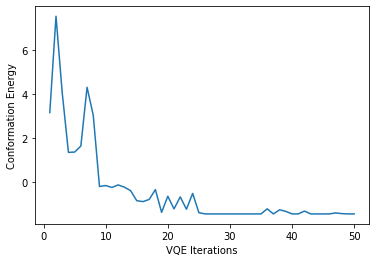

In [14]:
import matplotlib.pyplot as plt

figure = plt.figure()

plt.plot(counts, values)
plt.ylabel("Conformation Energy")
plt.xlabel("VQE Iterations")

plt.show()

As we can see, the amount of energy in the 50th iteration has converged, so the process is interrupted and no longer continues.
If you execute this program for several times, You will get different plot.